# import necessary libraries:


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, MobileNet   
from keras import layers     
from tensorflow.keras.models import Model      
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import os     
import PIL   
import glob
import random      
import numpy as np

import matplotlib.pyplot as plt     
import plotly.graph_objs as go     
import seaborn as sns         
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow import keras      
from keras.models import load_model
from tensorflow.random import set_seed    
             
from tensorflow.keras.optimizers import RMSprop

In [15]:
''' This code defines generators for loading image data from directories.
The generators use ImageDataGenerator from the tensorflow.keras.preprocessing.image module to apply 
data augmentation techniques to the training data and preprocess the data for training and testing.'''


trainDirectory = 'C:\\Users\\mahmoud mosbah\\Desktop\\data - Copy\\train'
testDirectory= 'C:\\Users\\mahmoud mosbah\\Desktop\\data - Copy\\test'
imageDataGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

testDataGenerator = ImageDataGenerator(rescale=1./255)
 
    
trainGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=False,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(224, 224))

validGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=False,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(224, 224))

testDataGenerator = ImageDataGenerator(rescale=1./255)
               
testGenerator = testDataGenerator.flow_from_directory(testDirectory,
                                             batch_size=16,
                                             target_size=(224, 224),
                                              shuffle=False
                                                     
                                                     )

Found 1278 images belonging to 8 classes.
Found 319 images belonging to 8 classes.
Found 267 images belonging to 8 classes.


In [4]:
# # Create list of class names 
# classes = trainGenerator.class_indices

# # Create classes.txt file 
# with open('file for 6 classs.txt', 'w') as f:
#   for c in classes:
#     f.write(c + '\n')


# the model

In [5]:
''''This code defines a deep learning model for image classification
using the pretrained MobileNetV2 architecture with transfer learning.
The model consists of several dense layers with dropout regularization to prevent overfitting '''

from keras.applications.mobilenet_v2 import MobileNetV2
IMG_SIZE = 224
batch_size = 32

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                        include_top=False)

base_model.trainable = False

from keras.layers import GlobalAveragePooling2D, Dense, Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(8, activation='softmax')(x)

from keras.models import Model

model = Model(base_model.input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 1, mode = 'auto')

In [8]:


history = model.fit(trainGenerator, validation_data=validGenerator, 
 epochs = 100, batch_size = 32, callbacks = [earlystop])


Epoch 1/100
28/40 [====================>.........] - ETA: 17s - loss: 2.7169 - accuracy: 0.1897

C:\Users\mahmoud mosbah\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 79s 2s/step - loss: 2.4439 - accuracy: 0.2355 - val_loss: 1.1090 - val_accuracy: 0.7837
Epoch 2/100
40/40 [==============================] - 73s 2s/step - loss: 0.9157 - accuracy: 0.7152 - val_loss: 0.7023 - val_accuracy: 0.7743
Epoch 3/100
40/40 [==============================] - 71s 2s/step - loss: 0.6202 - accuracy: 0.8044 - val_loss: 0.3602 - val_accuracy: 0.9248
Epoch 4/100
40/40 [==============================] - 71s 2s/step - loss: 0.3844 - accuracy: 0.8826 - val_loss: 0.3697 - val_accuracy: 0.8934
Epoch 5/100
40/40 [==============================] - 73s 2s/step - loss: 0.2796 - accuracy: 0.9131 - val_loss: 0.4645 - val_accuracy: 0.8495
Epoch 6/100
40/40 [==============================] - 72s 2s/step - loss: 0.2404 - accuracy: 0.9288 - val_loss: 0.3718 - val_accuracy: 0.8966
Epoch 7/100
40/40 [==============================] - 72s 2s/step - loss: 0.2083 - accuracy: 0.9397 - val_loss: 0.4707 - val_accuracy: 0.8558
Epoch 8/100
40/40 [======

20/20 [==============================] - 14s 718ms/step - loss: 0.4240 - accuracy: 0.8903


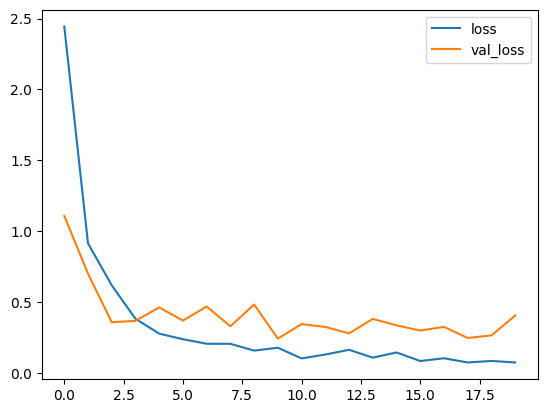

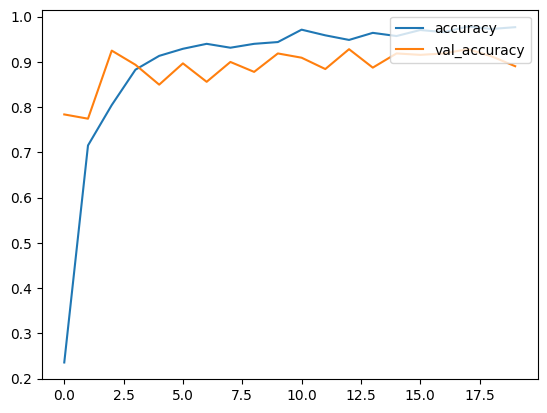

In [9]:
'''This code evaluates the performance of the trained model on the validation data
and displays the training and validation loss and accuracy curves using matplotlib.'''

model.evaluate(validGenerator)
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()


In [10]:
# Test the model on the test data
test_loss, test_acc = model.evaluate(testGenerator)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

17/17 [==============================] - 10s 583ms/step - loss: 0.3107 - accuracy: 0.9363
Test accuracy: 0.9363296031951904
Test loss: 0.3107317090034485


17/17 [==============================] - 12s 602ms/step


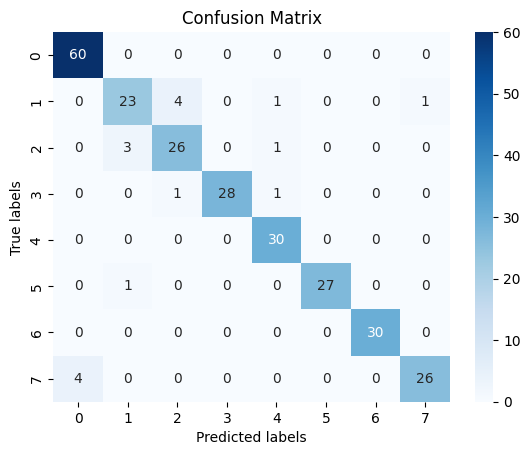

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true class labels for the test data
y_true = testGenerator.classes
# Get the predicted class probabilities for new data
y_pred = model.predict(testGenerator)

# Convert the predicted class probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get the predicted class probabilities for new data
y_pred = model.predict(testGenerator)

# Convert the predicted class probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = testGenerator.classes

# Generate the classification report
target_names = list(testGenerator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=target_names)

# Print the classification report
print(report)

17/17 [==============================] - 10s 574ms/step
              precision    recall  f1-score   support

      Laptop       0.94      1.00      0.97        60
    backpack       0.85      0.79      0.82        29
         bag       0.84      0.87      0.85        30
      blazer       1.00      0.93      0.97        30
         hat       0.91      1.00      0.95        30
       shoes       1.00      0.96      0.98        28
        sofa       1.00      1.00      1.00        30
  wristwatch       0.96      0.87      0.91        30

    accuracy                           0.94       267
   macro avg       0.94      0.93      0.93       267
weighted avg       0.94      0.94      0.94       267



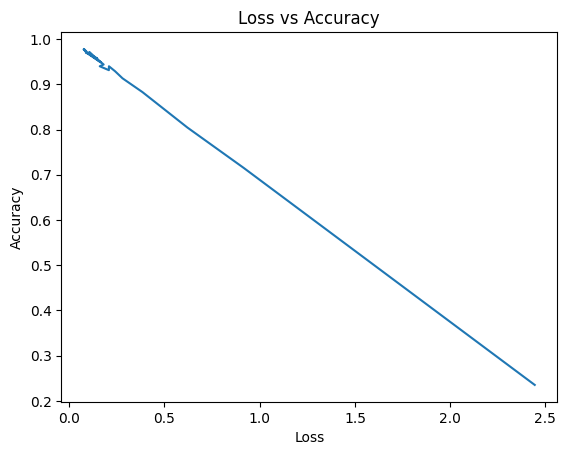

In [19]:
# Plot loss vs accuracy 
plt.plot(history.history['loss'], history.history['accuracy'])
plt.title('Loss vs Accuracy')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# # Convert Keras model to TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model 
# with open('model8class.tflite', 'wb') as f:
#   f.write(tflite_model)
# import pickle
# import pickle
# config = model.get_config()
# with open('model8class.pkl', 'wb') as f:
#     pickle.dump(config, f)
# model.save('model8class.h5')
